In [70]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [71]:
img = plt.imread('lena_color.gif')

In [72]:
imb3 = img[:,:,1]

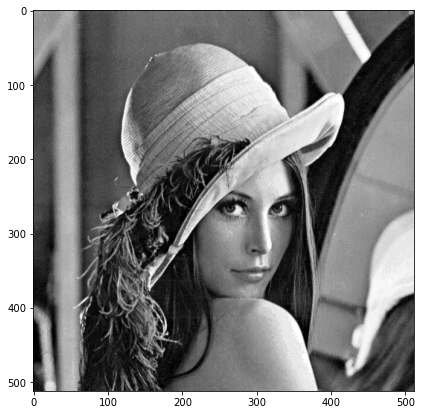

In [73]:
fig = plt.figure(figsize=(7,7))
a=fig.add_subplot(1,1,1)
plt.imshow(imb3,cmap='gray')

In [74]:
def gussianfilter(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX

    G = np.zeros((s,s))

    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2+y**2)/(2*(sigma**2)))
            G[x-minX,y-minY] = v 
    return G 

In [75]:
gussian_mask = gussianfilter(5,1)
gussian_mask

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [76]:
cv_gussian = cv2.filter2D(imb3,-1,gussian_mask)

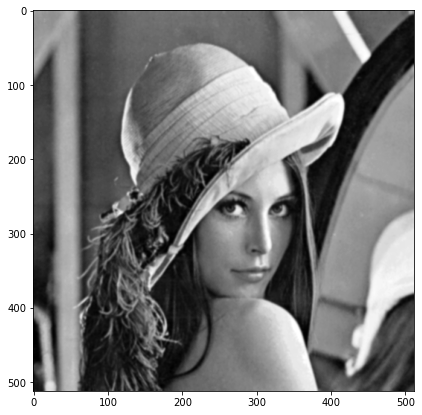

In [77]:
fig = plt.figure(figsize=(7,7))
a=fig.add_subplot(1,1,1)
plt.imshow(cv_gussian,cmap='gray')

In [78]:
mask_x = np.zeros((2,1))
mask_x[0] = -1
mask_x[1] = 1

In [79]:
mask_x

array([[-1.],
       [ 1.]])

In [80]:
Ix = cv2.filter2D(cv_gussian,-1,mask_x)
mask_y= mask_x.T
Iy = cv2.filter2D(cv_gussian,-1,mask_y)

Text(0.5, 1.0, 'Y-derivative')

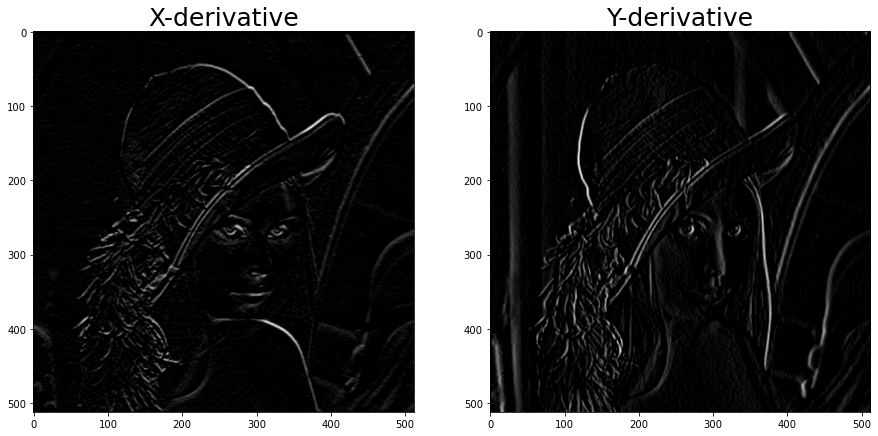

In [81]:
fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(Ix,cmap='gray')
plt.title("X-derivative",fontsize=25)
a=fig.add_subplot(1,2,2)
plt.imshow(Iy,cmap='gray')
plt.title("Y-derivative",fontsize=25)

In [82]:
def Gx(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX

    gx = np.zeros((s,s))

    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-x/(2*np.pi*(sigma**4)))*np.exp(-(x**2+y**2)/(2*(sigma**2)))
            gx[x-minX,y-minY] = v 
    return gx

In [83]:
def Gy(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX

    gy = np.zeros((s,s))

    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-y/(2*np.pi*(sigma**4)))*np.exp(-(x**2+y**2)/(2*(sigma**2)))
            gy[x-minX,y-minY] = v 
    return gy

In [84]:
gx_mask = Gx(3,0.5)
gy_mask = Gy(3,0.5)

In [85]:
gx_mask,gy_mask

(array([[ 0.04664039,  0.34462847,  0.04664039],
        [ 0.        ,  0.        ,  0.        ],
        [-0.04664039, -0.34462847, -0.04664039]]),
 array([[ 0.04664039,  0.        , -0.04664039],
        [ 0.34462847,  0.        , -0.34462847],
        [ 0.04664039,  0.        , -0.04664039]]))

In [86]:
Ix = cv2.filter2D(imb3,-1,gx_mask)
Iy = cv2.filter2D(imb3,-1,gy_mask)

Text(0.5, 1.0, 'Y-derivative')

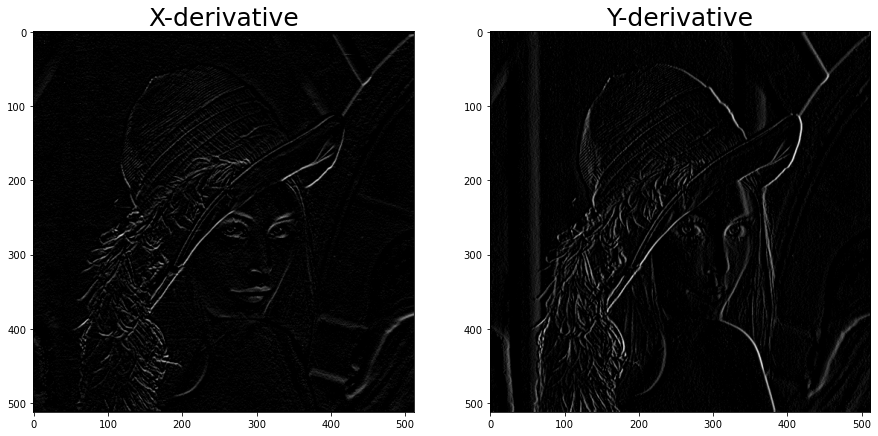

In [87]:
fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(Ix,cmap='gray')
plt.title("X-derivative",fontsize=25)
a=fig.add_subplot(1,2,2)
plt.imshow(Iy,cmap='gray')
plt.title("Y-derivative",fontsize=25)

In [93]:
Gm = (Ix**2 +Iy**2)**0.5
Gd = np.rad2deg(np.arctan2(Iy,Ix))

In [108]:
Gm = np.int16(np.fix(Gm))
Gd = np.int16(np.fix(Gd))

In [109]:
Gd.min(),Gd.max(),Gd.shape,Gm.min(),Gm.max()

(0, 90, (512, 512), 0, 15)

Text(0.5, 1.0, 'Gd')

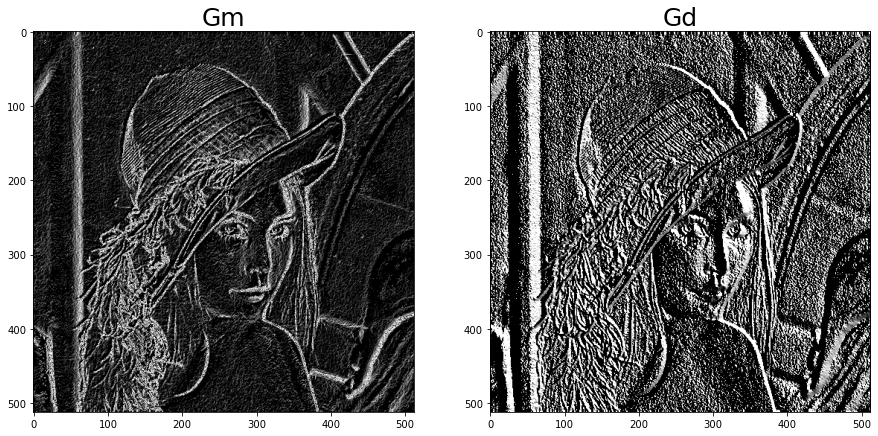

In [111]:
fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(Gm,cmap='gray')
plt.title("Gm",fontsize=25)
a=fig.add_subplot(1,2,2)
plt.imshow(Gd,cmap='gray')
plt.title("Gd",fontsize=25)

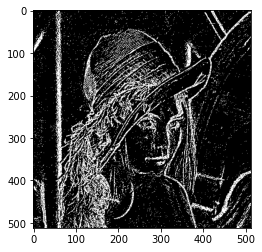

In [119]:
plt.imshow(Gm>5,cmap='gray')

In [120]:
bins = np.array([0., 15. , 30. ,45. , 60., 75., 90.])
inds = np.digitize(Gd,bins)-1
gd_bin = bins[inds.flatten().reshape(Gd.shape)]


In [ ]:
L= Gm.mean()
H = L+Gm.std()
E = cv2.threshold(Gm,L,H)